In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
x = 6 * np.random.rand(200,1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)

# y = 0.8x^2 + 0.9x + 2

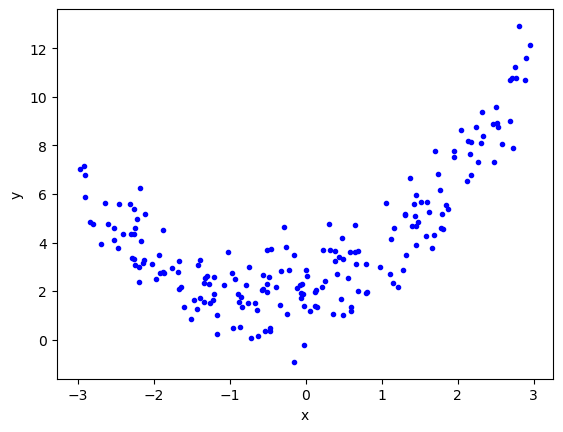

In [3]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(x_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.19031258932464068

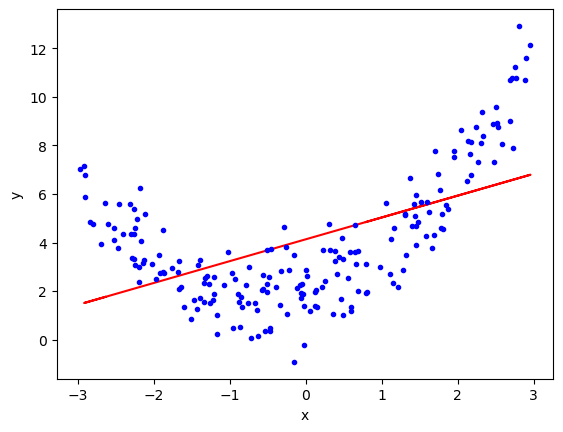

In [9]:
# Now again if we see the graph with best fit line then 
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Here what we are doing is that we are trying to justify our non linear data with a line which is incorrect 
and we'll never get correct ans 

# Applying Polynomial Linear Regression

In [15]:
# Degree 2
#poly = PolynomialFeatures(degree=2,include_bias=False)  # if we don't need x^0 term 
poly = PolynomialFeatures(degree=2,include_bias=True)
# Taking True because we know we have bias term in our data 
# but for othere data we can confirm it by applying both

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [16]:
print(x_train[0])
print(x_train_trans[0])

[0.79497717]
[1.         0.79497717 0.6319887 ]


In [17]:
# include_bias parameter 

In [18]:
lr = LinearRegression()

In [20]:
lr.fit(x_train_trans,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test_trans)

In [22]:
r2_score(y_test,y_pred)

0.8139989741217271

In [23]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87448416 0.76907611]]
[2.0704042]


In [25]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

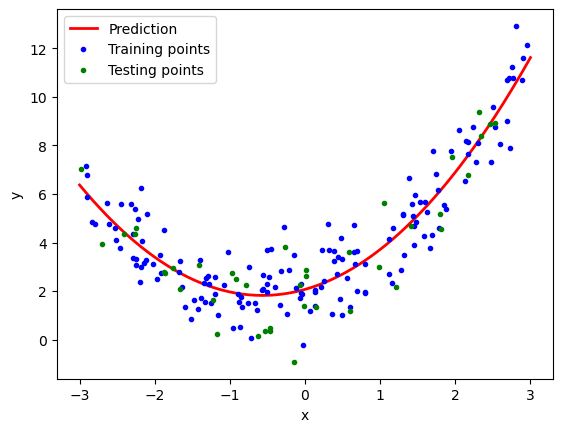

In [26]:
plt.plot(x_new,y_new,"r-",linewidth=2,label = "Prediction")
plt.plot(x_train,y_train,"b.",label = "Training points")
plt.plot(x_test,y_test,"g.",label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# Lets check the impact of degree on our model
# Below code is will give us graph based on different degree value
def polynomial_regression(degree):
    x_new = np.linspace(-3,3,100).reshape(100,1)
    x_new_poly = poly.transform(x_new)
    
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg",lin_reg)
    ])
    polynomial_regression.fit(x,y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new,y_newbig,'r',label="Degree" + str(degree),linewidth=2)
    plt.plot(x_train,y_train,"b.",linewidth = 3)
    plt.plot(x_test,y_test,"g.",linewidth = 3)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-3,3,0,10])
    plt.show()
    

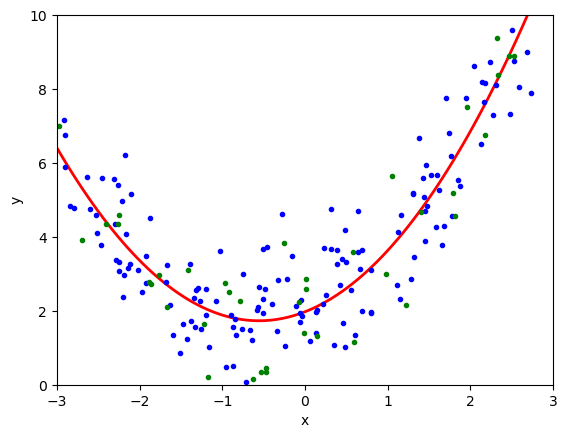

In [35]:
polynomail_regression(2)

# 3D POLYNOMIAL REGRESSION

In [36]:
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.rand(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [37]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df , x=x.ravel() , y=y.ravel() , z=z.ravel())
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid,yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
# Linear plot for polynomial regression  
import plotly.graph_objects as go
fig = px.scatter_3d(df , x = x.ravel(), y = y.ravel(), z = z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))
fig.show()

In [52]:
x_multi = np.array([x,y]).reshape(100,2)
x_multi.shape

(100, 2)

In [53]:
poly = PolynomialFeatures(degree=2)
x_multi_trans = poly.fit_transform(x_multi)

In [54]:
print("Input",poly.n_features_in_)
print("Output",poly.n_output_features_)
print("Powers\n",poly.powers_)


Input 2
Output 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [55]:
x_multi_trans.shape

(100, 6)

In [56]:
lr = LinearRegression()
lr.fit(x_multi_trans,z)

LinearRegression()

In [57]:
x_test_multi = poly.transform(final)

In [58]:
z_final = lr.predict(x_multi_trans).reshape(10,10)

In [59]:
fig = px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
fig.show()